In [1]:
import pandas as pd
import numpy as np

In [2]:
s = pd.Series([10,20,30,40,50])

In [3]:
type(s)

pandas.core.series.Series

In [4]:
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [5]:
s[0]

10

In [5]:
sales = pd.Series([10,20,40,30,50], index= ['mon','tue','wed','thu','fri'])   # Custom index

In [6]:
sales

mon    10
tue    20
wed    40
thu    30
fri    50
dtype: int64

In [7]:
sales['fri']

50

In [8]:
sales[0]  # Position 

10

In [11]:
marks = pd.Series([60,80,56,89,66], index =[101,102,103,104,105])

In [11]:
marks

101    60
102    80
103    56
104    89
105    66
dtype: int64

In [12]:
marks[101]

60

In [13]:
marks[0]  # will throw error

KeyError: 0

In [14]:
nums = pd.Series( np.random.randint(1,100,10), index = np.arange(11,21))

In [15]:
nums

11    54
12    60
13    36
14    82
15    63
16    37
17    22
18    30
19    38
20    17
dtype: int32

### Properties of Series

In [16]:
nums.is_unique

True

In [17]:
nums.axes   # Row labels

[Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')]

In [18]:
print(nums.index),
print(type(nums.index))

Int64Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], dtype='int64')
<class 'pandas.core.indexes.numeric.Int64Index'>


In [19]:
print(nums.values, type(nums.values))

[54 60 36 82 63 37 22 30 38 17] <class 'numpy.ndarray'>


### loc and iloc

In [18]:
nums[11], nums.loc[11]   # Index (row label)

(69, 69)

In [19]:
nums.iloc[0]    # Position 

69

In [20]:
# for loc end range is inclusive  
nums.loc[11:15]

11    69
12    74
13    55
14    60
15    97
dtype: int32

In [21]:
nums.iloc[0:5]   # for iloc it is exclusive 

11    69
12    74
13    55
14    60
15    97
dtype: int32

#### Fancy indexing

In [22]:
nums[ nums > 50 ]  # Boolean indexing

11    69
12    74
13    55
14    60
15    97
16    74
17    65
18    71
dtype: int32

In [23]:
nums.loc[[11,15,20]]  # Row labels

11    69
15    97
20    33
dtype: int32

In [24]:
nums.iloc[[0,4,6]]    # Row positions

11    69
15    97
17    65
dtype: int32

### Methods of Series 

In [25]:
nums.describe()

count    10.000000
mean     60.900000
std      23.886072
min      11.000000
25%      56.250000
50%      67.000000
75%      73.250000
max      97.000000
dtype: float64

In [28]:
summary = nums.describe()
print(type(summary))

<class 'pandas.core.series.Series'>


In [29]:
summary['mean'], summary['50%']

(60.9, 67.0)

In [26]:
nums.mean()

60.9

In [30]:
nums.index.is_unique

True

<AxesSubplot:>

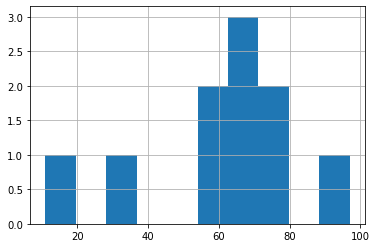

In [31]:
nums.hist()

#### Iteration

In [34]:
for i,n in nums.items():
     print(f"{i} - {n}")

11 - 69
12 - 74
13 - 55
14 - 60
15 - 97
16 - 74
17 - 65
18 - 71
19 - 11
20 - 33


In [32]:
for n in nums:
    print(n)

69
74
55
60
97
74
65
71
11
33


#### Ranking

In [2]:
marks = pd.Series([60,70,80,60,85,75])

In [37]:
marks.rank()

0    1.5
1    3.0
2    5.0
3    1.5
4    6.0
5    4.0
dtype: float64

In [38]:
marks.rank(ascending=False)

0    5.5
1    4.0
2    2.0
3    5.5
4    1.0
5    3.0
dtype: float64

In [39]:
marks.rank(method='min')

0    1.0
1    3.0
2    5.0
3    1.0
4    6.0
5    4.0
dtype: float64

In [52]:
marks.rank(method='dense')

0    1.0
1    2.0
2    4.0
3    1.0
4    5.0
5    3.0
dtype: float64

In [41]:
marks.rank(method='dense', ascending=False)

0    5.0
1    4.0
2    2.0
3    5.0
4    1.0
5    3.0
dtype: float64

In [42]:
marks.rank(method='first')

0    1.0
1    3.0
2    5.0
3    2.0
4    6.0
5    4.0
dtype: float64

#### Selecting rows

In [44]:
marks.head()   # First 5

0    60
1    70
2    80
3    60
4    85
dtype: int64

In [45]:
marks.tail(3)

3    60
4    85
5    75
dtype: int64

In [48]:
pd.Series([10,20,30,15,30]).pct_change() * 100

0      NaN
1    100.0
2     50.0
3    -50.0
4    100.0
dtype: float64

In [49]:
marks.sort_values(ascending=False)

4    85
2    80
5    75
1    70
3    60
0    60
dtype: int64

In [52]:
marks.quantile(.25)

62.5

In [51]:
marks.quantile([.25,.75])

0.25    62.50
0.75    78.75
dtype: float64

In [57]:
def count_even(s):
    print(type(s))
    count = 0
    for n in s:
        if n % 2 == 0:
            count +=1
    return count 

In [58]:
marks.agg(['min','max','sum','mean','count', count_even])

<class 'int'>
<class 'pandas.core.series.Series'>


min            60.000000
max            85.000000
sum           430.000000
mean           71.666667
count           6.000000
count_even      4.000000
dtype: float64

In [5]:
marks

0    60
1    70
2    80
3    60
4    85
5    75
dtype: int64

#### apply()

In [3]:
def get_grade(v):
    if v > 80:
        return "A"
    elif v > 60:
        return "B"
    else:
        return "C"

In [4]:
marks.apply(get_grade)

0    C
1    B
2    B
3    C
4    A
5    B
dtype: object

In [6]:
marks.apply(lambda v : 'Passed' if v >=70 else 'Failed')

0    Failed
1    Passed
2    Passed
3    Failed
4    Passed
5    Passed
dtype: object

In [7]:
for v in map(get_grade,marks):
     print(v)

C
B
B
C
A
B


In [62]:
marks.count()

6

In [63]:
marks.sort_values(ascending=False)

4    85
2    80
5    75
1    70
3    60
0    60
dtype: int64

In [17]:
marks.sort_values(ascending=False).iloc[3:5]

1    70
3    60
dtype: int64

In [19]:
smarks = marks.sort_values(ascending=False)

In [27]:
smarks

4    85
2    80
5    75
1    70
3    60
0    60
dtype: int64

In [20]:
smarks.head(3)

4    85
2    80
5    75
dtype: int64

In [21]:
smarks.tail(3)

1    70
3    60
0    60
dtype: int64

#### Saving series

In [33]:
sales = pd.Series((100,120,150,100,200), index  = np.arange(1,6))
sales.name  ="Units"
sales.index.name = "Month"

In [31]:
sales

1    100
2    120
3    150
4    100
5    200
dtype: int64

In [34]:
sales.to_csv("sales.csv")

In [35]:
sales.to_json()

'{"1":100,"2":120,"3":150,"4":100,"5":200}'

In [36]:
sales.value_counts()

100    2
150    1
200    1
120    1
Name: Units, dtype: int64

#### load from csv file 

In [37]:
# load data from csv
sales = pd.read_csv("sales.csv")

In [38]:
type(sales)

pandas.core.frame.DataFrame

### Handle null (na) values

In [39]:
sales = pd.Series((100,120,150,100,200,np.nan,175,np.nan,200,100), 
                   index  = np.arange(1,11))
sales.name  ="Units"
sales.index.name = "Month"

In [40]:
sales

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [41]:
sales.isnull()    # sales.isna()

Month
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8      True
9     False
10    False
Name: Units, dtype: bool

In [42]:
sales.notna().sum()   #  Count no. of not null values 

8

In [45]:
sales.notna().value_counts()

True     8
False    2
Name: Units, dtype: int64

In [46]:
sales.fillna(0)

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       0.0
7     175.0
8       0.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [47]:
sales.dropna()  # inplace=True will modify series inplace 

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
Name: Units, dtype: float64

In [22]:
sales

Month
1     100.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [48]:
sales.fillna(sales.mean())

Month
1     100.000
2     120.000
3     150.000
4     100.000
5     200.000
6     143.125
7     175.000
8     143.125
9     200.000
10    100.000
Name: Units, dtype: float64

In [49]:
sales[1] = 200

In [50]:
sales

Month
1     200.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [51]:
sales2  = sales.dropna()   # Gets a copy of sales 

In [52]:
sales2[1] = 50 

In [53]:
sales

Month
1     200.0
2     120.0
3     150.0
4     100.0
5     200.0
6       NaN
7     175.0
8       NaN
9     200.0
10    100.0
Name: Units, dtype: float64

In [54]:
sales2

Month
1      50.0
2     120.0
3     150.0
4     100.0
5     200.0
7     175.0
9     200.0
10    100.0
Name: Units, dtype: float64